* Importing Necessary Libraries

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [222]:
import kagglehub
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Kamo\.cache\kagglehub\datasets\laotse\credit-risk-dataset\versions\1


In [223]:
df=pd.read_csv(path+'/credit_risk_dataset.csv')
pd.set_option('display.float_format', '{:.2f}'.format)

# Description of Variables

**person_age**: The age of the person.

**person_income**: The annual income of the person.

**person_home_ownership**: Information about the person's home ownership status.

**person_emp_length**: The length of time the person has been employed, measured in years.

**loan_intent**: The stated purpose or reason for the loan.

**loan_grade**: The assigned grade of the loan, likely reflecting a risk assessment.

**loan_amnt**: The amount of the loan.

**loan_int_rate**: The interest rate for the loan.

**loan_status**: The status of the loan, indicating whether it is non-default (0) or default (1). This is the target variable for predicting credit risk.

**loan_percent_income**: The loan amount as a percentage of the person's annual income.

**cb_person_default_on_file**: Indicates whether the person has a historical record of defaulting on credit.

**cb_preson_cred_hist_length**: The length of the person's credit history.

In [224]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23714,27,65000,MORTGAGE,3.00,DEBTCONSOLIDATION,B,15000,10.75,0,0.23,N,5
20220,33,39504,MORTGAGE,17.00,EDUCATION,A,3000,7.37,0,0.08,N,5
31724,39,24000,OWN,0.00,HOMEIMPROVEMENT,A,3000,7.74,0,0.13,N,11
11366,26,74000,MORTGAGE,10.00,VENTURE,B,4475,9.99,0,0.06,N,4
17760,25,105000,MORTGAGE,3.00,VENTURE,C,12000,12.84,0,0.11,N,3
16475,25,40000,MORTGAGE,9.00,MEDICAL,C,3500,13.49,0,0.09,Y,3
14238,25,102000,MORTGAGE,9.00,DEBTCONSOLIDATION,C,14400,NaN,0,0.14,Y,2
25399,30,38000,OWN,0.00,EDUCATION,B,6000,11.58,0,0.16,N,7
18122,35,175000,MORTGAGE,12.00,VENTURE,A,2200,8.49,0,0.01,N,7
28148,31,140000,MORTGAGE,15.00,VENTURE,A,12000,7.88,0,0.09,N,7


**Data Cleaning and Handling Missing Values**

In [225]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [226]:
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [227]:
df[df['loan_int_rate'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.00,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.00,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.00,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.00,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.00,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.00,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.00,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.00,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.00,PERSONAL,A,7500,NaN,0,0.13,N,23


In [228]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)

In [229]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df.groupby('loan_grade')['loan_int_rate'].transform('median')
)

In [230]:
df = df[df["person_age"] <= 95]

In [231]:

df[df['person_emp_length'] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.00,VENTURE,A,20000,6.54,0,0.10,N,4


In [232]:
#Dropping rows where employment length is greater than age
indices_to_drop = df[df['person_emp_length'] > df["person_age"]].index
df = df.drop(indices_to_drop)

In [233]:
df[df['person_emp_length'] > 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [234]:
df = df[df['person_emp_length'] < 60]

In [235]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.00,32574.00,32574.00,32574.00,32574.00,32574.00,32574.00,32574.00
mean,27.72,65878.48,4.78,9588.02,11.01,0.22,0.17,5.80
std,6.20,52531.94,3.98,6320.25,3.21,0.41,0.11,4.05
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.88,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.48,0.00,0.23,8.00
max,94.00,2039784.00,41.00,35000.00,23.22,1.00,0.83,30.00


In [236]:
df['loan_status'].value_counts(normalize=True)

loan_status
0   0.78
1   0.22
Name: proportion, dtype: float64

* Average Length of Employment

In [237]:
# Calculate averages
avg_age = round(df['person_age'].mean())
avg_employment = round(df['person_emp_length'].mean())
avg_income = round(df['person_income'].mean(), 2)
avg_loan = round(df['loan_amnt'].mean(), 2)

average = {
    "age": avg_age,
    "employment_years": avg_employment,
    "income": avg_income,
    "loan_amount": avg_loan
}

for key, value in average.items():
    print(f"The average {key} is {value}")


The average age is 28
The average employment_years is 5
The average income is 65878.48
The average loan_amount is 9588.02


# Charts

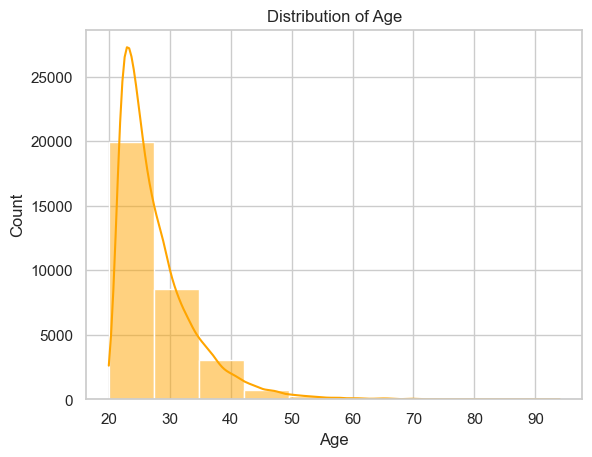

In [238]:
# Histogram of age
sns.histplot(df['person_age'], kde=True, bins=10,color="orange")
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

Most of the people who took loans are in their 20s however people in their 30s also took loans there was a smaller number of people 70 and above

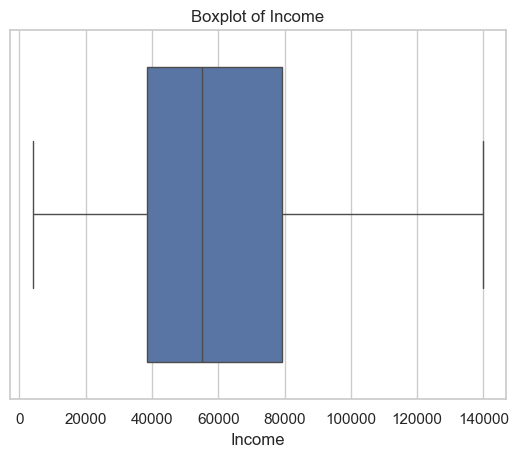

In [239]:
sns.boxplot(x=df['person_income'], orient='h',showfliers=False)
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()

The income of most of the people was in the range of 40,000 and 80,000.

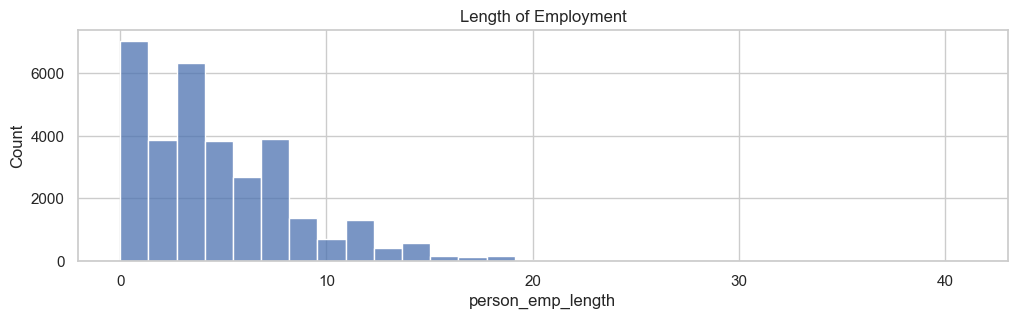

In [240]:
plt.figure(figsize=(12,3))
sns.histplot(data=df,x="person_emp_length",bins=30)
plt.title("Length of Employment")
plt.show()

Most people have been employed for less than 10 years

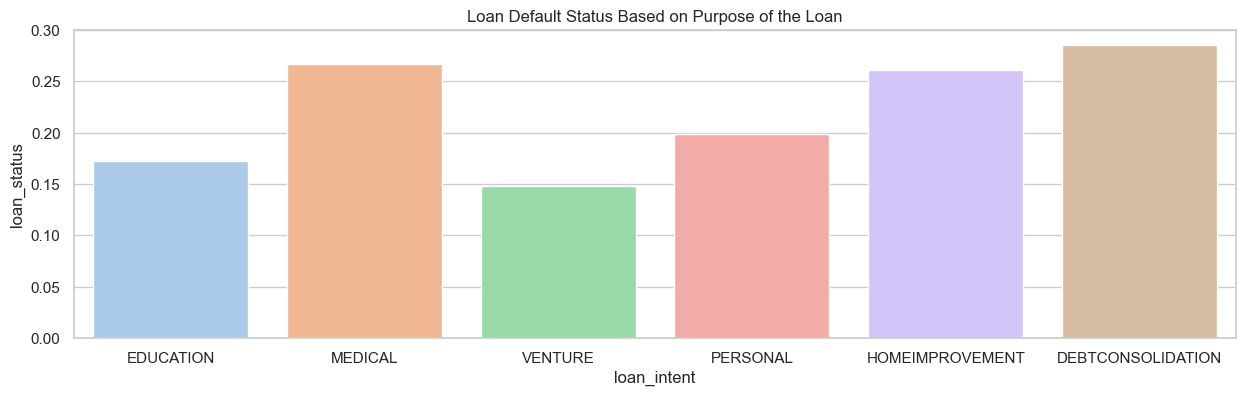

In [241]:
plt.figure(figsize=(15, 4))
sns.barplot(x="loan_intent", y="loan_status", palette="pastel",hue="loan_intent",ci=None,data=df)
plt.title("Loan Default Status Based on Purpose of the Loan")
plt.show()

Most of the loans were taken for Debt Consolidation,Medical Needs and Home improvement with Venture Being the least

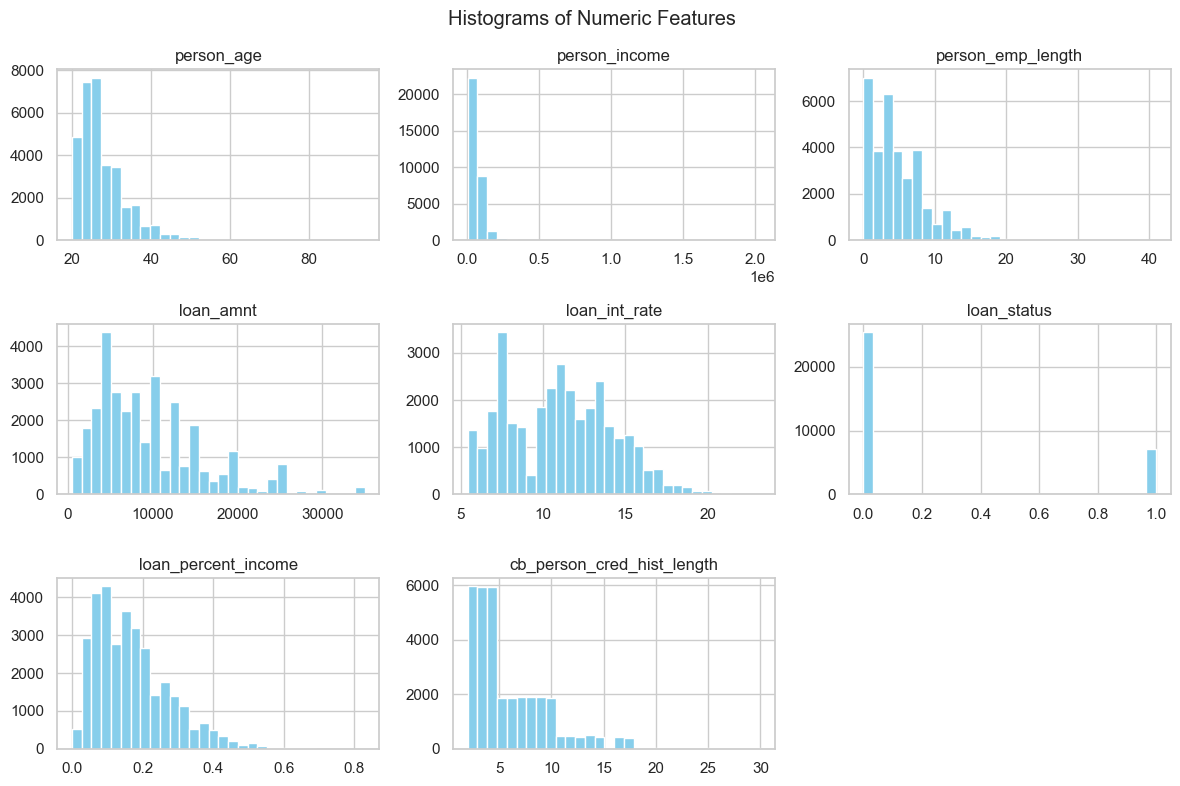

In [242]:
df.hist(bins=30, figsize=(12, 8),color="skyblue")
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

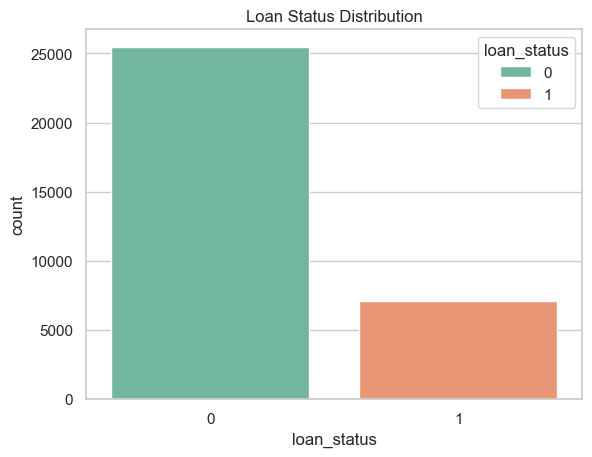

In [243]:
# Loan status count plot
sns.countplot(x='loan_status',hue="loan_status", palette="Set2",data=df)
plt.title('Loan Status Distribution')
plt.show()

The Chart shows the Number of people who defaulted on their loans. We see that the people the defaulted on loans are less than those that did not.The Data is imbalanced

In [244]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

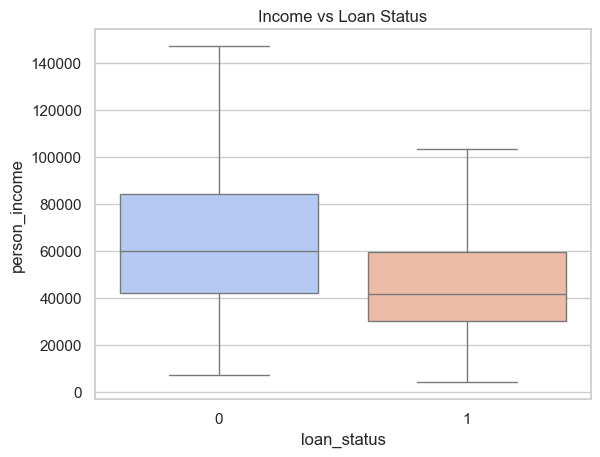

In [245]:
# Income vs loan status
sns.boxplot(x='loan_status', y='person_income',palette="coolwarm",showfliers=False, data=df)
plt.title('Income vs Loan Status')

plt.show()

People with Higher incomes were less likely to default on their loans

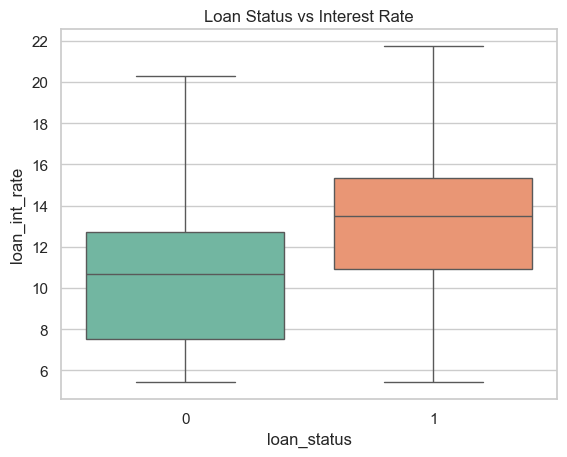

In [246]:
sns.boxplot(x='loan_status', y='loan_int_rate', data=df, palette='Set2',showfliers=False)
plt.title('Loan Status vs Interest Rate')
plt.show()


People who defaulted on loans had higher interest rates on their loans

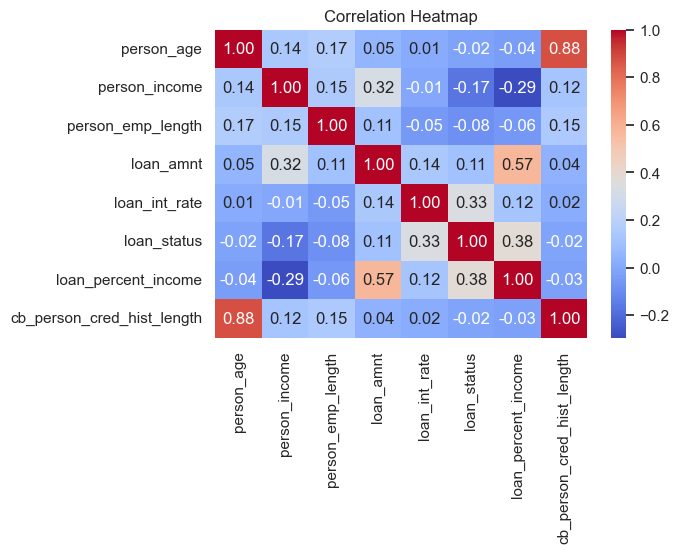

In [247]:
# Only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Encoding Categorical Variables

In [248]:
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [249]:
from sklearn.preprocessing import LabelEncoder

In [250]:
home_enc=LabelEncoder()
grade_enc=LabelEncoder()
intent_enc=LabelEncoder()
prevdefault_enc=LabelEncoder()

In [251]:
df['person_home_ownership']=home_enc.fit_transform(df['person_home_ownership'])
df['loan_grade']=grade_enc.fit_transform(df['loan_grade'])
df['loan_intent']=intent_enc.fit_transform(df['loan_intent'])
df['cb_person_default_on_file']=prevdefault_enc.fit_transform(df['cb_person_default_on_file'])

In [252]:
print("Home Ownership Encoding:")
for i, label in enumerate(home_enc.classes_):
    print(f"{label}: {i}")

print("\nLoan Grade Encoding:")
for i, label in enumerate(grade_enc.classes_):
    print(f"{label}: {i}")

print("\nLoan Purpose Encoding:")
for i, label in enumerate(intent_enc.classes_):
    print(f"{label}: {i}")

print("\nPrevious Default Encoding:")
for i, label in enumerate(prevdefault_enc.classes_):
    print(f"{label}: {i}")


Home Ownership Encoding:
MORTGAGE: 0
OTHER: 1
OWN: 2
RENT: 3

Loan Grade Encoding:
A: 0
B: 1
C: 2
D: 3
E: 4
F: 5
G: 6

Loan Purpose Encoding:
DEBTCONSOLIDATION: 0
EDUCATION: 1
HOMEIMPROVEMENT: 2
MEDICAL: 3
PERSONAL: 4
VENTURE: 5

Previous Default Encoding:
N: 0
Y: 1


In [253]:
df['has_short_credit_history'] = (df['cb_person_cred_hist_length'] < 2).astype(int)

**Renaming Columns for Readability**

In [254]:
df.rename(columns={
    'person_age': 'age',
    'person_income': 'income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'employment_years',
    'loan_intent': 'loan_purpose',
    'loan_amnt': 'loan_amount',
    'loan_int_rate': 'interest_rate',
    'loan_status': 'default_status',
    'loan_percent_income': 'loan_to_income',
    'cb_person_default_on_file': 'has_previous_default',
    'cb_person_cred_hist_length': 'credit_history_years',
    'has_short_credit_history': 'short_credit_history'
}, inplace=True)


In [255]:
df.to_csv("../data/data1.csv", index=False)
